### DATASET OBTAINED FROM
[IDS-2017](https://www.unb.ca/cic/datasets/ids-2017.html)

In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
# Read data
data = pd.read_csv("cic2017.csv")

label_mapping = {'BENIGN': 0, 'Bot': 1, 'BruteForce': 2, 'DoS': 3, 'Infiltration': 4, 'PortScan': 5, 'WebAttack': 6}
data['Label'] = data['Label'].map(label_mapping)

# Data preprocessing
# Drop rows with infinite or large values
data = data.replace([float('inf'), float('-inf')], pd.NA)
data = data.dropna()

# Separate features and target variable
X_ini = data.drop(columns=['Label'])
y_ini = data['Label']



In [8]:
label_counts = data['Label'].value_counts()

print(label_counts)

smote = SMOTE()


X, y = smote.fit_resample(X_ini, y_ini)

# Count the occurrences of each unique value in the resampled target variable
label_counts_resampled = pd.Series(y).value_counts()

print(label_counts_resampled)

Label
0    22719
3    18984
5     7938
2     2767
6     2180
1     1956
4       36
Name: count, dtype: int64
Label
0    22719
3    22719
5    22719
1    22719
4    22719
6    22719
2    22719
Name: count, dtype: int64


In [9]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Predictions
nb_predictions = nb_model.predict(X_test_scaled)




nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='macro')
nb_recall = recall_score(y_test, nb_predictions, average='macro')
nb_f1 = f1_score(y_test, nb_predictions, average='macro')

print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)


Naive Bayes Metrics:
Accuracy: 0.7933473763636936
Precision: 0.8189815631369065
Recall: 0.7902505451935935
F1 Score: 0.765294652254948


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predictions
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='macro')
dt_recall = recall_score(y_test, dt_predictions, average='macro')
dt_f1 = f1_score(y_test, dt_predictions, average='macro')

print("Decision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)


Decision Tree Metrics:
Accuracy: 0.9967302794982237
Precision: 0.9967046571495902
Recall: 0.9967054963609205
F1 Score: 0.9967047413989337


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='macro')
rf_recall = recall_score(y_test, rf_predictions, average='macro')
rf_f1 = f1_score(y_test, rf_predictions, average='macro')

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Random Forest Metrics:
Accuracy: 0.9970446757003175
Precision: 0.9970425902184425
Recall: 0.9970089617624259
F1 Score: 0.9970235427580295


In [14]:
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate the model
et_model = ExtraTreesClassifier()

# Train the model
et_model.fit(X_train_scaled, y_train)

et_predictions = et_model.predict(X_test_scaled)

# Evaluate the model
et_accuracy = accuracy_score(y_test, et_predictions)
et_precision = precision_score(y_test, et_predictions, average='macro')
et_recall = recall_score(y_test, et_predictions, average='macro')
et_f1 = f1_score(y_test, et_predictions, average='macro')

print("Extra Trees Metrics:")
print("Accuracy:", et_accuracy)
print("Precision:", et_precision)
print("Recall:", et_recall)
print("F1 Score:", et_f1)

Extra Trees Metrics:
Accuracy: 0.9961643663344547
Precision: 0.9961513724143181
Recall: 0.9961140931733093
F1 Score: 0.9961292683667239


In [15]:
from xgboost import XGBClassifier

# Instantiate the model
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='macro')
xgb_recall = recall_score(y_test, xgb_predictions, average='macro')
xgb_f1 = f1_score(y_test, xgb_predictions, average='macro')

print("XGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)


XGBoost Metrics:
Accuracy: 0.9983965793693212
Precision: 0.9983878352598848
Recall: 0.9983845512355618
F1 Score: 0.9983861189454213


In [16]:
from sklearn.ensemble import VotingClassifier

# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('nb', nb_model),
    ('dt', dt_model),
    ('rf', rf_model),
    ('et', et_model),
    ('xgb', xgb_model)
], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predictions
ensemble_predictions = ensemble_model.predict(X_test_scaled)

# Evaluate the model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions, average='macro')
ensemble_recall = recall_score(y_test, ensemble_predictions, average='macro')
ensemble_f1 = f1_score(y_test, ensemble_predictions, average='macro')

print("Ensemble Metrics:")
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1)


Ensemble Metrics:
Accuracy: 0.9979878643065991
Precision: 0.9979878490393073
Recall: 0.9979642376156335
F1 Score: 0.9979747286856566


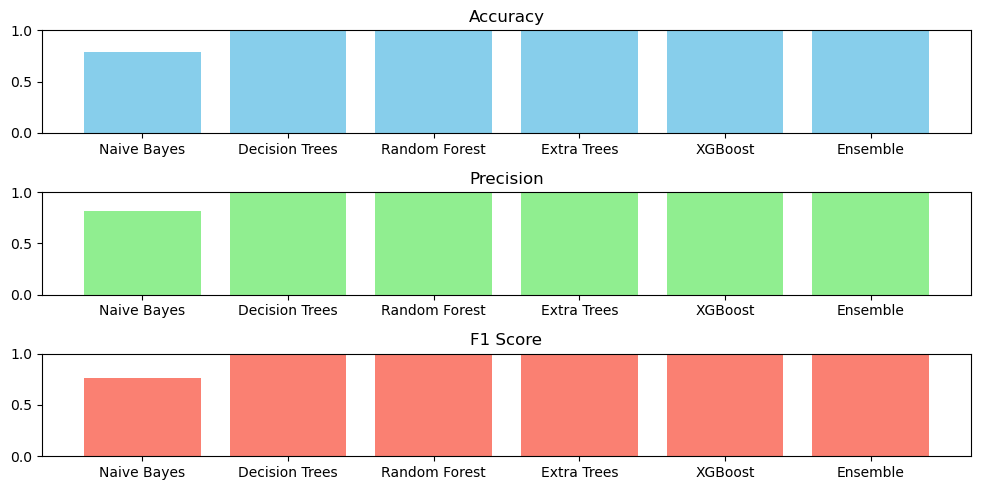

In [21]:
import matplotlib.pyplot as plt

# Metrics data
models = ['Naive Bayes', 'Decision Trees', 'Random Forest', 'Extra Trees', 'XGBoost', 'Ensemble']
accuracies = [nb_accuracy, dt_accuracy, rf_accuracy, et_accuracy, xgb_accuracy, ensemble_accuracy]
precisions = [nb_precision, dt_precision, rf_precision, et_precision, xgb_precision, ensemble_precision]
f1_scores = [nb_f1, dt_f1, rf_f1, et_f1, xgb_f1, ensemble_f1]

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)

plt.subplot(3, 1, 2)
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision')
plt.ylim(0, 1)

plt.subplot(3, 1, 3)
plt.bar(models, f1_scores, color='salmon')
plt.title('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


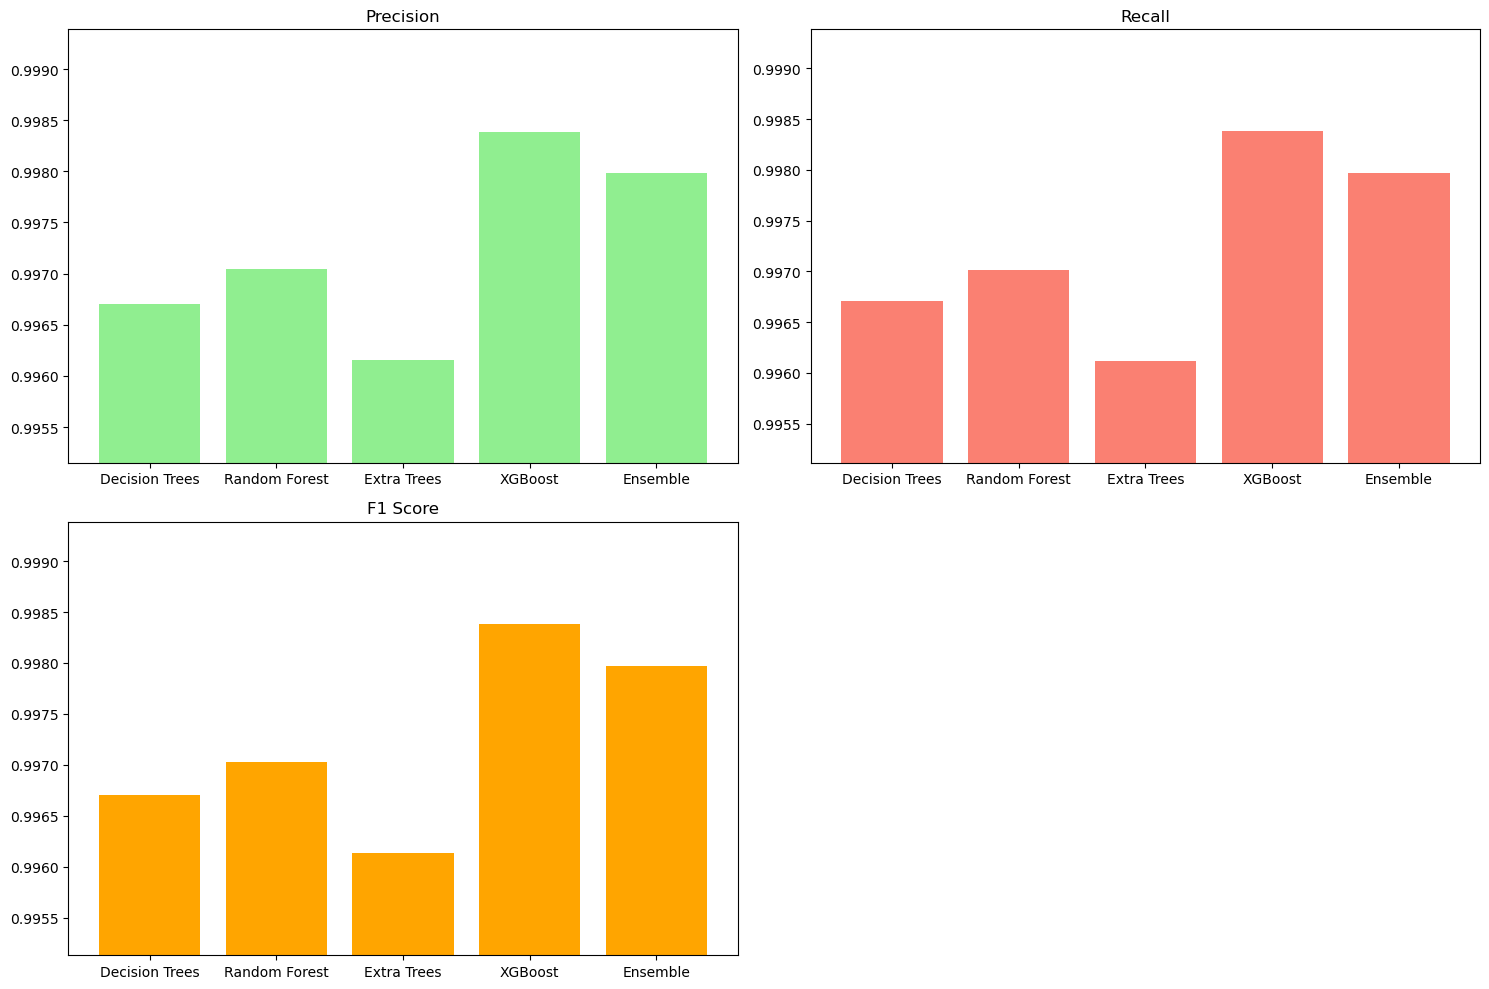

In [18]:
import matplotlib.pyplot as plt

# Metrics data
models = ['Decision Trees', 'Random Forest', 'Extra Trees', 'XGBoost', 'Ensemble']
accuracies = [dt_accuracy, rf_accuracy, et_accuracy, xgb_accuracy, ensemble_accuracy]
precisions = [dt_precision, rf_precision, et_precision, xgb_precision, ensemble_precision]
recalls = [dt_recall, rf_recall, et_recall, xgb_recall, ensemble_recall]
f1_scores = [dt_f1, rf_f1, et_f1, xgb_f1, ensemble_f1]

# Plotting
plt.figure(figsize=(15, 10))



plt.subplot(2, 2, 1)
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision')
plt.ylim(min(precisions) - 0.001, max(precisions) + 0.001)

plt.subplot(2, 2, 2)
plt.bar(models, recalls, color='salmon')
plt.title('Recall')
plt.ylim(min(recalls) - 0.001, max(recalls) + 0.001)

plt.subplot(2, 2, 3)
plt.bar(models, f1_scores, color='orange')
plt.title('F1 Score')
plt.ylim(min(f1_scores) - 0.001, max(f1_scores) + 0.001)

plt.tight_layout()
plt.show()
